Análisis Exploratorio de Datos 

In [2]:
#Importamos librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


EDA Dataset Steam_Games

In [3]:
#Extraemos la data
eda_steam=pd.read_csv('Datasets/steam_games_ML.csv', encoding='utf8')
eda_steam

,item_id,app_name,title,genres,release_date,publisher,developer
0,761140,Lost Summoner Kitty,Lost Summoner Kitty,Action,2018,Kotoshiro,Kotoshiro
1,761140,Lost Summoner Kitty,Lost Summoner Kitty,Casual,2018,Kotoshiro,Kotoshiro
2,761140,Lost Summoner Kitty,Lost Summoner Kitty,Indie,2018,Kotoshiro,Kotoshiro
3,761140,Lost Summoner Kitty,Lost Summoner Kitty,Simulation,2018,Kotoshiro,Kotoshiro
4,761140,Lost Summoner Kitty,Lost Summoner Kitty,Strategy,2018,Kotoshiro,Kotoshiro
...,...,...,...,...,...,...,...
71547,610660,Russian Roads,Russian Roads,Indie,2018,Laush Studio,Laush Dmitriy Sergeevich
71548,610660,Russian Roads,Russian Roads,Racing,2018,Laush Studio,Laush Dmitriy Sergeevich
71549,610660,Russian Roads,Russian Roads,Simulation,2018,Laush Studio,Laush Dmitriy Sergeevich
71550,658870,EXIT 2 - Directions,EXIT 2 - Directions,Casual,2017,SIXNAILS,"xropi,stev3ns"


In [4]:
#Verificamos valores y tipos de datos de las columnas
eda_steam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71552 entries, 0 to 71551
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   item_id       71552 non-null  int64 
 1   app_name      71550 non-null  object
 2   title         71550 non-null  object
 3   genres        71552 non-null  object
 4   release_date  71552 non-null  int64 
 5   publisher     59066 non-null  object
 6   developer     71202 non-null  object
dtypes: int64(2), object(5)
memory usage: 3.8+ MB


In [5]:
#verificamos las dimensioness
eda_steam.shape

(71552, 7)

In [6]:
#Verificamos los valores nulos que hay en el datasets
eda_steam.isnull().sum()


item_id             0
app_name            2
title               2
genres              0
release_date        0
publisher       12486
developer         350
dtype: int64

In [7]:
#Sustituimos los valores nulos con "Sin info" para poder graficar
columnas_nulos=["publisher", "app_name","developer","genres",'title']
null= eda_steam[columnas_nulos].fillna("Sin info")
eda_steam1 = pd.concat([eda_steam.drop(columnas_nulos, axis=1), null], axis=1)
eda_steam1.tail(10)


,item_id,release_date,publisher,app_name,developer,genres,title
71542,773640,2018,Ghost_RUS Games,Colony On Mars,"Nikita ""Ghost_RUS""",Simulation,Colony On Mars
71543,773640,2018,Ghost_RUS Games,Colony On Mars,"Nikita ""Ghost_RUS""",Strategy,Colony On Mars
71544,733530,2018,Sacada,LOGistICAL: South Africa,Sacada,Casual,LOGistICAL: South Africa
71545,733530,2018,Sacada,LOGistICAL: South Africa,Sacada,Indie,LOGistICAL: South Africa
71546,733530,2018,Sacada,LOGistICAL: South Africa,Sacada,Strategy,LOGistICAL: South Africa
71547,610660,2018,Laush Studio,Russian Roads,Laush Dmitriy Sergeevich,Indie,Russian Roads
71548,610660,2018,Laush Studio,Russian Roads,Laush Dmitriy Sergeevich,Racing,Russian Roads
71549,610660,2018,Laush Studio,Russian Roads,Laush Dmitriy Sergeevich,Simulation,Russian Roads
71550,658870,2017,SIXNAILS,EXIT 2 - Directions,"xropi,stev3ns",Casual,EXIT 2 - Directions
71551,658870,2017,SIXNAILS,EXIT 2 - Directions,"xropi,stev3ns",Indie,EXIT 2 - Directions


In [8]:
#Verificamos que no hayan valores nulos
eda_steam1.isnull().sum()

item_id         0
release_date    0
publisher       0
app_name        0
developer       0
genres          0
title           0
dtype: int64

Identificador unico de contenido (Item_id)


In [9]:
identificador=eda_steam1["item_id"].value_counts()
identificador

item_id
313320    11
708940    10
376120    10
620040    10
622470     9
          ..
471893     1
572380     1
231485     1
231477     1
353330     1
Name: count, Length: 28850, dtype: int64

Hay un total de 28.850 de Id de juegos

Año de lanzamiento(release_date)

In [10]:
#Vemos los datos por cada año
anio_lanzamiento=eda_steam1["release_date"].value_counts()
anio_lanzamiento

release_date
2017    24968
2016    17667
2015    12256
2014     6341
2013     3016
2012     2106
2011      986
0         850
2010      653
2009      486
2008      332
2018      312
2007      259
2006      217
2005      139
2003      118
2001      109
2004       92
1999       80
1998       75
1997       64
2002       62
1996       56
2000       55
1994       52
1995       49
1993       40
1992       24
1991       22
1990       14
1989       11
2019       10
1988        9
1984        5
1987        5
1986        5
1983        3
2021        3
1985        1
Name: count, dtype: int64

El año con mas lanzamientos fue en el año 2017 con 24968 registros

C:\Users\Armando\AppData\Local\Temp\ipykernel_16452\3564478263.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=anio_lanzamiento.index, y=anio_lanzamiento.values, palette=("Set1"))


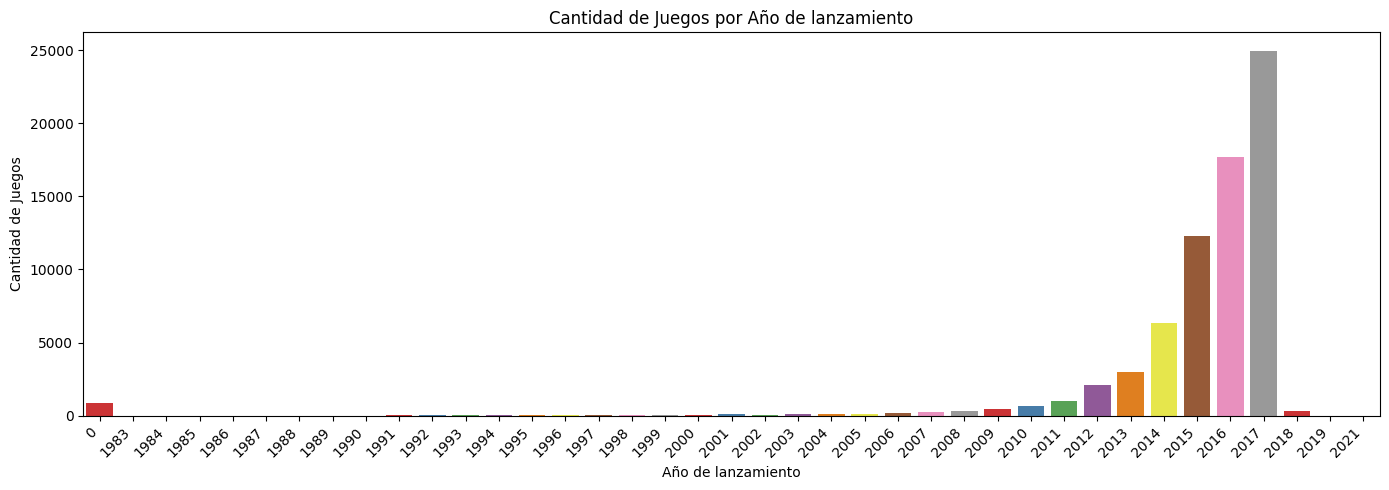

In [11]:
anio_lanzamiento=anio_lanzamiento.sort_index()
plt.figure(figsize=(14, 5))
sns.barplot(x=anio_lanzamiento.index, y=anio_lanzamiento.values, palette=("Set1"))
plt.xlabel('Año de lanzamiento') ; plt.ylabel('Cantidad de Juegos') ; plt.title('Cantidad de Juegos por Año de lanzamiento')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

La cantidad de juegos que fueron lanzados en la plataforma comenzo a partir del 2011 con mayor crecimiento hasta tener su mayor creciemiento en el 2017.

Empresa publicadora del contenido (Publisher)


In [15]:
#Vemos valores por cada empresa
publicadora=eda_steam1["publisher"].value_counts()
publicadora

publisher
Sin info                   12486
KISS ltd                     807
Ubisoft                      684
Degica                       528
Paradox Interactive          441
                           ...  
Nurgo Software                 1
Ubisoft - San Francisco        1
Marcos Dumont                  1
Ready Play Games               1
PyrofrogStudos                 1
Name: count, Length: 8224, dtype: int64

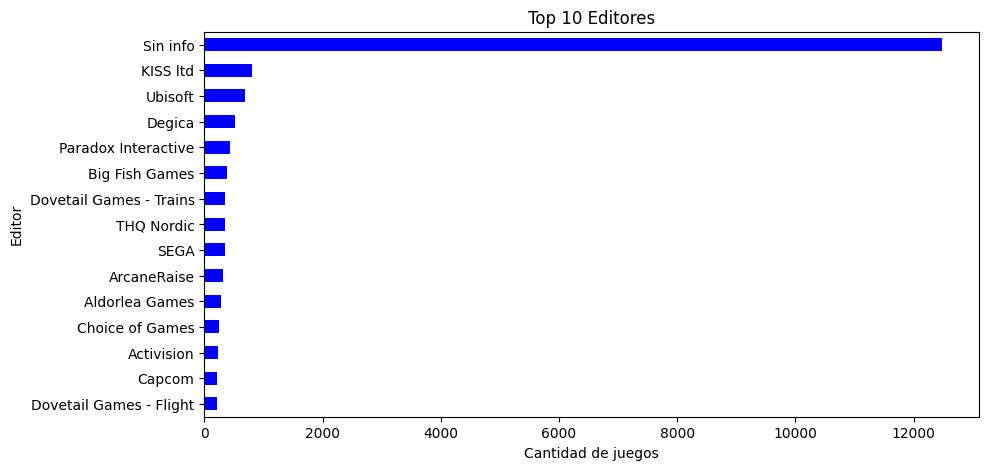

In [17]:
plt.figure(figsize=(10, 5))
publicadora[:15].plot(kind='barh', color='blue')
plt.xlabel('Cantidad de juegos') ; plt.ylabel('Editor') ; plt.title('Top 10 Editores')
plt.gca().invert_yaxis()  # Esta línea invierte el eje y para mostrar el editor principal en la parte superior


La mayoria de las columnas estan sin informacion de la empresa quien publica el contenido, la empresa con mayor registro es KISS Itd 

Nombre del contenido(app_name)

In [12]:
Contenido=eda_steam1["app_name"].value_counts()
Contenido

app_name
AutoTileSet                                        11
Multiplicity                                       10
Assault Corps 2                                    10
Rebons                                             10
Marble Mayhem: Fragile Ball                         9
                                                   ..
F7 Southern Pacific "Bloody Nose" Add-on Livery     1
BR Class 31 Ochre Add-on Livery                     1
Seeders                                             1
In Between Demo                                     1
Depth Crawler Gold Coat                             1
Name: count, Length: 28828, dtype: int64

Generos(genres)

In [25]:
generos=eda_steam1["genres"].value_counts()
generos

genres
Indie                        15858
Action                       11320
Casual                        8282
Adventure                     8242
Strategy                      6957
Simulation                    6699
RPG                           5479
Free to Play                  2031
Early Access                  1462
Sports                        1257
Massively Multiplayer         1108
Racing                        1083
Design &amp; Illustration      460
Utilities                      340
Web Publishing                 268
Animation &amp; Modeling       183
Education                      125
Video Production               116
Software Training              105
Audio Production                93
Photo Editing                   77
Accounting                       7
Name: count, dtype: int64

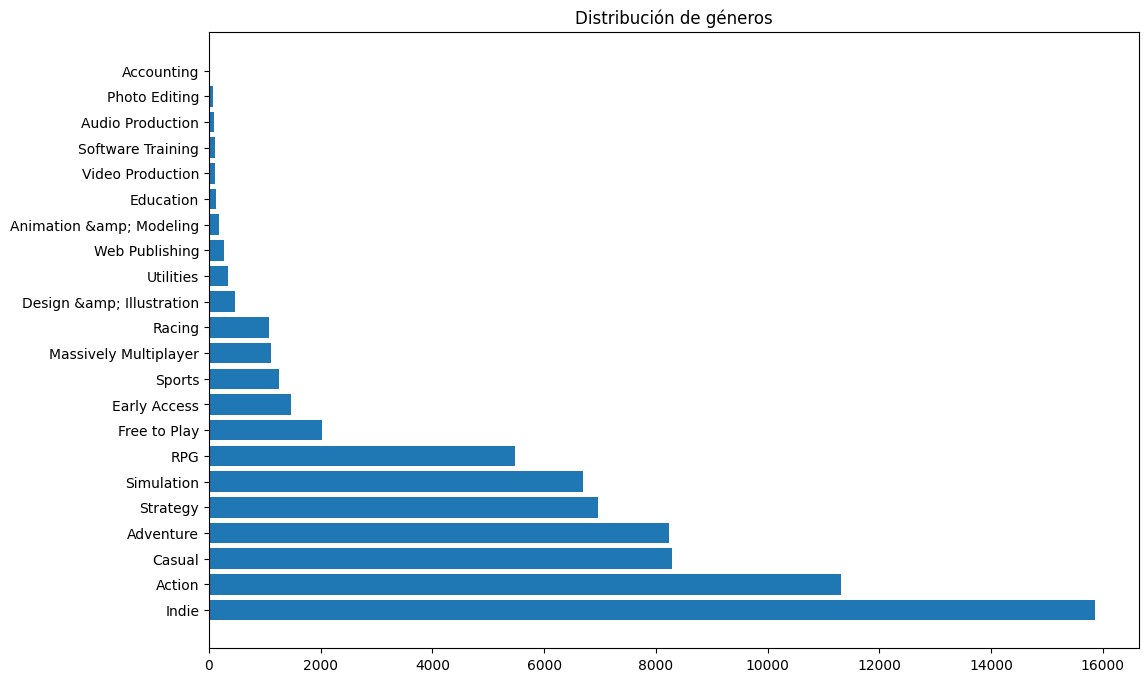

In [26]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(generos.index, generos)
ax.set_yticks(generos.index)
ax.set_yticklabels(generos.index)
ax.set_title("Distribución de géneros")
plt.show()




Desarrollador(developer)



In [18]:
developer= eda_steam1["developer"].value_counts()
developer

developer
Ubisoft - San Francisco                                                             2516
SmiteWorks USA, LLC                                                                 2364
DL Softworks                                                                         495
Ronimo Games                                                                         379
Sin info                                                                             350
                                                                                    ... 
Viron Shake                                                                            1
Fewjix                                                                                 1
Kyuppin                                                                                1
NHLislive                                                                              1
Evan Hatampour,K.Song Tan,Anton Kagounkin Magdalina,Stuart Hwang,Mike VanPeursem       1
Name: count

Text(0.5, 1.0, 'Top 10 Developers')

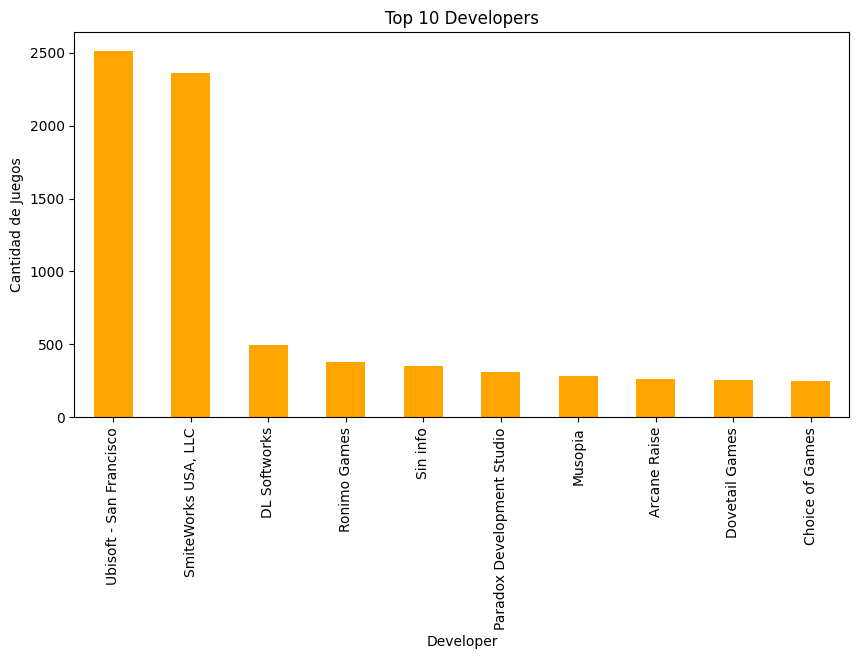

In [20]:
plt.figure(figsize=(10, 5))
developer[:10].plot(kind='bar', color='orange')
plt.xlabel('Developer') ; plt.ylabel('Cantidad de Juegos') ; plt.title('Top 10 Developers')

El desarrollador con mas juegos es la empresa Ubisoft - San Francisco con registros de 2.516

EDA Datasets User_Reviews

In [26]:
#Extraemos la data
eda_review=pd.read_csv('Datasets/reviews_ETL.csv', encoding='utf8')
eda_review

,user_id,posted,item_id,helpful,recommend,sentiment_analisis,Posted
0,76561197970982479,"November 5, 2011",1250,No ratings yet,True,1,2011
1,76561197970982479,"July 15, 2011",22200,No ratings yet,True,2,2011
2,76561197970982479,"April 21, 2011",43110,No ratings yet,True,1,2011
3,js41637,"June 24, 2014",251610,15 of 20 people (75%) found this review helpful,True,1,2014
4,js41637,"September 8, 2013",227300,0 of 1 people (0%) found this review helpful,True,1,2013
...,...,...,...,...,...,...,...
59270,Fuckfhaisjnsnsjakaka,July 10,70,No ratings yet,True,1,0
59271,3214213216,July 8,362890,No ratings yet,True,1,0
59272,ChrisCoroner,July 3,273110,1 of 2 people (50%) found this review helpful,True,1,0
59273,CaptainAmericaCw,July 20,730,No ratings yet,True,2,0


In [24]:
#Verificamos si hay valores nulos que interfieran en el analisis
eda_review.isnull().sum()

user_id               0
posted                0
item_id               0
helpful               0
recommend             0
sentiment_analisis    0
Posted                0
dtype: int64

identificador unico de usuario(user_id)


In [30]:
#Contabilizamos los datos
user= eda_review["user_id"].value_counts()
user

user_id
76561198064484479    20
MIMMATA              20
dannysfatass         20
chicken_tonight      20
Letachal             20
                     ..
MegaTeamAJ            1
MeGoring              1
Hogia                 1
__UW0TM8__            1
76561198267374962     1
Name: count, Length: 25460, dtype: int64

El valor total es de 25.460 de usuarios

Recomendaciones de los usuarios(recommend)

In [31]:
#Contabilizamos los datos
recomendacion= eda_review["recommend"].value_counts()
recomendacion

recommend
True     52446
False     6829
Name: count, dtype: int64

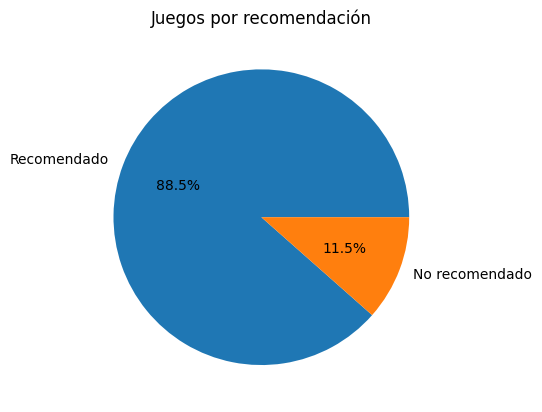

In [32]:
plt.pie([52446, 6829], labels=['Recomendado', 'No recomendado'], autopct='%1.1f%%')
plt.title('Juegos por recomendación')
plt.show()


Analisis de sentimentos (sentiment_analisis)

Columna que aplica el análisis de sentimiento con NLP

In [33]:
#Contabilizamos los datos
analisis= eda_review["sentiment_analisis"].value_counts()
analisis

sentiment_analisis
1    39885
2    15349
0     4041
Name: count, dtype: int64

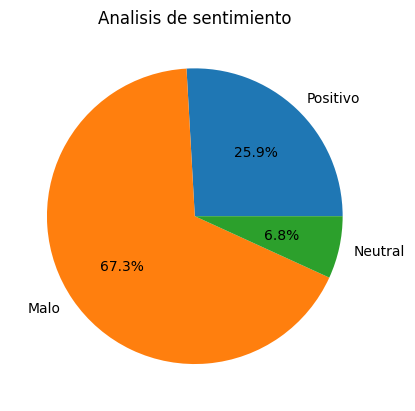

In [34]:
plt.pie([15349, 39885,4041], labels=['Positivo','Malo','Neutral' ], autopct='%1.1f%%')
plt.title('Analisis de sentimiento')
plt.show()

EDA Datasets user_items

In [35]:
#Extraemos la data
eda_items=pd.read_csv('Datasets/user_items_EtL.csv', encoding='utf8')
eda_items

,user_id,item_id,item_name,playtime_forever,steam_id,items_count
0,76561197970982479,10,Counter-Strike,6,76561197970982479,277
1,76561197970982479,20,Team Fortress Classic,0,76561197970982479,277
2,76561197970982479,30,Day of Defeat,7,76561197970982479,277
3,76561197970982479,40,Deathmatch Classic,0,76561197970982479,277
4,76561197970982479,50,Half-Life: Opposing Force,0,76561197970982479,277
...,...,...,...,...,...,...
5153204,76561198329548331,346330,BrainBread 2,0,76561198329548331,7
5153205,76561198329548331,373330,All Is Dust,0,76561198329548331,7
5153206,76561198329548331,388490,One Way To Die: Steam Edition,3,76561198329548331,7
5153207,76561198329548331,521570,You Have 10 Seconds 2,4,76561198329548331,7


In [36]:
#Verificamos si hay valores nulos que interfieran en el analisis
eda_items.isnull().sum()

user_id             0
item_id             0
item_name           0
playtime_forever    0
steam_id            0
items_count         0
dtype: int64

Titulos de juego(item_name)

In [38]:
nom_juegos= eda_items["item_name"].value_counts()
nom_juegos
#Revisamos cuales son los juegs mas repetidos

item_name
Dota 2 Test                            49571
Counter-Strike: Global Offensive       43776
Garry's Mod                            43301
Unturned                               38682
Left 4 Dead 2                          37044
                                       ...  
My Own Pet                                 1
Medieval Battlefields Black Edition        1
Football VR                                1
Tower Dwellers                             1
Arachnophobia                              1
Name: count, Length: 10947, dtype: int64

Text(0.5, 1.0, 'Top 5 de juegos')

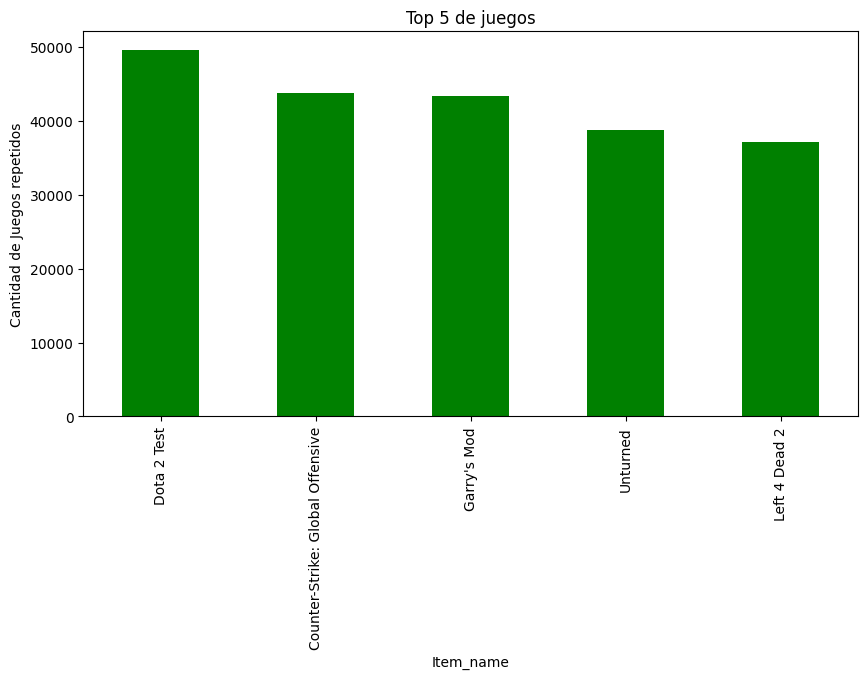

In [42]:
plt.figure(figsize=(10, 5))
nom_juegos[:5].plot(kind='bar', color='green')
plt.xlabel('Item_name') ; plt.ylabel('Cantidad de Juegos repetidos') ; plt.title('Top 5 de juegos')

Horas de juego (playtime_forever) por usuario (user_id)

In [49]:
#observamos cual es el mayor horas jugadas por usuario, los primeros (10) usuarios
tiempo_juego= eda_items.groupby('user_id')['playtime_forever'].unique().explode()
tiempo_juego=pd.DataFrame(tiempo_juego)
tiempo_juego1= tiempo_juego.sort_values('playtime_forever', ascending=False)
tiempo_juego1.head(10)

,playtime_forever
user_id,
wolop,642773
Evilutional,635295
76561198019826668,632452
76561198039832932,613411
tsunamitad,600068
jimmynoe,551719
shinomegami,530882
lildoughnut,501498
ThisIsWhereIGetOff,495058


Ya tras el analisis creamos un dataframe con las columnas a necesitar

In [50]:
data_ML= eda_steam1[["item_id", "app_name", "genres"]]
data_ML

,item_id,app_name,genres
0,761140,Lost Summoner Kitty,Action
1,761140,Lost Summoner Kitty,Casual
2,761140,Lost Summoner Kitty,Indie
3,761140,Lost Summoner Kitty,Simulation
4,761140,Lost Summoner Kitty,Strategy
...,...,...,...
71547,610660,Russian Roads,Indie
71548,610660,Russian Roads,Racing
71549,610660,Russian Roads,Simulation
71550,658870,EXIT 2 - Directions,Casual


In [52]:
modelodata_csv = "Datasets/modelo.csv"
data_ML.to_csv(modelodata_csv , index=False, encoding="utf-8")